In [81]:
# prliminaries
%matplotlib notebook

import matplotlib

import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

from IPython.display import display, HTML
from matplotlib.animation import FuncAnimation
from matplotlib.collections import LineCollection
from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib.animation import FFMpegWriter

matplotlib.rcParams['animation.embed_limit'] = 50  # Sets the limit to 50 MB

In [44]:
# import and munge data

col_types = {
    'Timestamp': 'int',
    'Callsign': 'str',
    'Position': 'str',
    'Altitude': 'int',
    'Speed': 'int',
    'Direction': 'int'
}

DL79 = pd.read_csv("../data/DL79_31d7299e.csv", parse_dates=['UTC'])

# Split the 'Position' column into two columns 'Latitude' and 'Longitude'
DL79[['Latitude', 'Longitude']] = DL79['Position'].str.split(',', expand=True).astype(float)
DL79.drop('Position', axis=1, inplace=True)
DL79['color'] = range(len(DL79)) # Make a color variable

print(DL79.dtypes)
display(DL79)

Timestamp                  int64
UTC          datetime64[ns, UTC]
Callsign                  object
Altitude                   int64
Speed                      int64
Direction                  int64
Latitude                 float64
Longitude                float64
color                      int64
dtype: object


Timestamp                       UTC Callsign  Altitude  Speed  \
0    1693562956 2023-09-01 10:09:16+00:00    DAL79         0      0   
1    1693563784 2023-09-01 10:23:04+00:00    DAL79         0      2   
2    1693563818 2023-09-01 10:23:38+00:00    DAL79         0      2   
3    1693563865 2023-09-01 10:24:25+00:00    DAL79         0      1   
4    1693563886 2023-09-01 10:24:46+00:00    DAL79         0      2   
..          ...                       ...      ...       ...    ...   
267  1693565594 2023-09-01 10:53:14+00:00    DAL79         0     47   
268  1693565601 2023-09-01 10:53:21+00:00    DAL79         0     36   
269  1693565608 2023-09-01 10:53:28+00:00    DAL79         0     25   
270  1693565615 2023-09-01 10:53:35+00:00    DAL79         0     17   
271  1693565622 2023-09-01 10:53:42+00:00    DAL79         0      8   

     Direction   Latitude  Longitude  color  
0          244  50.110107  14.269813      0  
1          225  50.110233  14.270138      1  
2          281  50.110462  14.270517      2  
3          345  50.110668  14.270665      3  
4          340  50.110874  14.270554      4  
..         ...        ...        ...    ...  
267        244  50.106548  14.242022    267  
268        244  50.105919  14.239944    268  
269        244  50.105511  14.238541    269  
270        244  50.105221  14.237576    270  
271        244  50.105057  14.237020    271  

[272 rows x 9 columns]

## Make the figure

In [3]:
# Create 3D plot
fig = go.Figure(data=[go.Scatter3d(
    x=DL79['Longitude'],
    y=DL79['Latitude'],
    z=DL79['Altitude'],
    mode='lines+markers',
    marker=dict(
        size=6,
        color=DL79['color'],                # set color based on the sequence of time
        colorscale='Viridis',            # set the color scale
        opacity=0.8
    ),
    line=dict(
        color=DL79['color'],
        colorscale='Viridis',
        width=2
    )
)])

# Setting the 3D plot layout
fig.update_layout(scene=dict(
                    xaxis_title='Longitude',
                    yaxis_title='Latitude',
                    zaxis_title='Altitude'),
                  margin=dict(t=0, b=0, l=0, r=0))

fig.show()

In [7]:

frames = []

# Iterate through the unique timestamps to create a frame for each
for time in DL79['UTC'].unique():
    df = DL79[DL79['UTC'] <= time]
    
    frame = go.Frame(data=[go.Scatter3d(
        x=df['Longitude'],
        y=df['Latitude'],
        z=df['Altitude'],
        mode='lines+markers',
        marker=dict(
            size=6,
            color=df.index,  # Using index to give a sequence of colors
            colorscale='Viridis',
            opacity=0.8
        ),
        line=dict(
            color=df.index,
            colorscale='Viridis',
            width=2
        ))], name=str(time))
    
    frames.append(frame)

# Create base frame
fig = go.Figure(data=frames[0]['data'],
                layout=go.Layout(
                    updatemenus=[dict(type='buttons',
                                     showactive=False,
                                     buttons=[dict(label='Play',
                                                   method='animate',
                                                   args=[None, dict(frame=dict(duration=100, redraw=True), fromcurrent=True)])])]),
                frames=frames)

# Setting the 3D plot layout
fig.update_layout(scene=dict(
                    xaxis_title='Longitude',
                    yaxis_title='Latitude',
                    zaxis_title='Altitude'),
                  margin=dict(t=0, b=0, l=0, r=0))

fig.show()

In [12]:
frames = []

# Iterate through the unique timestamps to create a frame for each
for time in DL79['UTC'].unique():
    df = DL79[DL79['UTC'] <= time]
    
    frame = go.Frame(data=[go.Scatter3d(
        x=df['Longitude'],
        y=df['Latitude'],
        z=df['Altitude'],
        mode='lines+markers',
        marker=dict(
            size=6,
            color=df.index,  # Using index to give a sequence of colors
            colorscale='Viridis',
            opacity=0.8
        ),
        line=dict(
            color=df.index,
            colorscale='Viridis',
            width=2
        ))], name=str(time))
    
    frames.append(frame)

# Create base frame
fig = go.Figure(data=frames[0]['data'],
                layout=go.Layout(
                    updatemenus=[dict(type='buttons',
                                     showactive=False,
                                     buttons=[dict(label='Play',
                                                   method='animate',
                                                   args=[None, dict(frame=dict(duration=100, redraw=True), fromcurrent=True)])])]),
                frames=frames)

# Setting the 3D plot layout
fig.update_layout(scene=dict(
                    xaxis_title='Longitude',
                    yaxis_title='Latitude',
                    zaxis_title='Altitude',
                    xaxis=dict(range=[min(DL79['Longitude']), max(DL79['Longitude'])], gridcolor='black', backgroundcolor='white'),
                    yaxis=dict(range=[min(DL79['Latitude']), max(DL79['Latitude'])], gridcolor='black', backgroundcolor='white'),
                    zaxis=dict(range=[0, max(DL79['Altitude'])], gridcolor='black', backgroundcolor='white'),
                    aspectmode='manual',
                    aspectratio=dict(x=2, y=2, z=1),  # adjust as per the data's spatial spread
                    bgcolor='white'
                  ),
                  margin=dict(t=0, b=0, l=0, r=0))

fig.show()


## Overlaid with a map

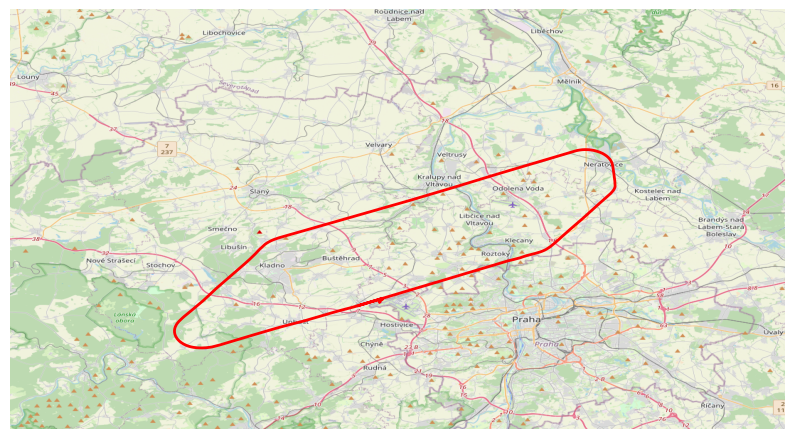

In [32]:
img = plt.imread("../data/Prague.png")

fig, ax = plt.subplots(figsize=(10, 10))
# You need to set these values manually based on the image's extent.
min_longitude = 13.6725
max_longitude = 14.9249
min_latitude = 49.9052
max_latitude = 50.5832

ax.imshow(img, extent=[min_longitude, max_longitude, min_latitude, max_latitude])

# Plot the flight path
ax.plot(DL79['Longitude'], DL79['Latitude'], color='r', lw=2)

# Hide axes for better visualization
ax.axis('off')

plt.show()

In [87]:
image_aspect_ratio = img.shape[0] / img.shape[1]
fig_width = 10  # you can adjust this as needed
fig_height = fig_width * image_aspect_ratio
fig, ax = plt.subplots(figsize=(fig_width, fig_height))
ax.set_position([0, 0, 1, 1])  # [left, bottom, width, height]
ax.set_title("")

img = plt.imread("../data/Prague.png")
ax.axis('off') 

# Normalize the altitude data for the color mapping
norm = Normalize(vmin=DL79['Altitude'].min(), vmax=DL79['Altitude'].max())

# Create a custom colormap
cmap = LinearSegmentedColormap.from_list("altitude", ["blue", "yellow"])

def init():
    ax.clear()
    ax.imshow(img, extent=[min_longitude, max_longitude, min_latitude, max_latitude])
    ax.axis('off')
    return ax.collections,

def animate(i):
    x = DL79['Longitude'][:i]
    y = DL79['Latitude'][:i]
    c = DL79['Altitude'][:i].to_list()

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    lc = LineCollection(segments, cmap=cmap, norm=norm, linewidth=2)
    lc.set_array(np.array(c))
    ax.add_collection(lc)

    return lc,

desired_interval = 20000 / len(DL79)
ani = FuncAnimation(fig, animate, frames=len(DL79), init_func=init, blit=False, repeat=False, interval=desired_interval)
# This will display the animation
#HTML(ani.to_jshtml())

<IPython.core.display.Javascript object>

In [93]:
# This works

ani.save('../output/DAL79.mp4', writer='ffmpeg', fps=15)

In [71]:
# this works
#ani.save('../output/DAL79.gif', writer='pillow', fps=10)